# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/temps.csv')

### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df['day_encoded'] = encoder.fit_transform(df['week'])
df

,year,month,day,week,temp_2,temp_1,average,actual,friend,day_encoded
0,2016,1,1,Fri,45,45,45.6,45,29,0
1,2016,1,2,Sat,44,45,45.7,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,56,3
3,2016,1,4,Mon,44,41,45.9,40,53,1
4,2016,1,5,Tues,41,40,46.0,44,41,5
...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47,5
344,2016,12,28,Wed,42,47,45.3,48,58,6
345,2016,12,29,Thurs,47,48,45.3,48,65,4
346,2016,12,30,Fri,48,48,45.4,57,42,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         348 non-null    int64  
 1   month        348 non-null    int64  
 2   day          348 non-null    int64  
 3   week         348 non-null    object 
 4   temp_2       348 non-null    int64  
 5   temp_1       348 non-null    int64  
 6   average      348 non-null    float64
 7   actual       348 non-null    int64  
 8   friend       348 non-null    int64  
 9   day_encoded  348 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 27.3+ KB


<Axes: >

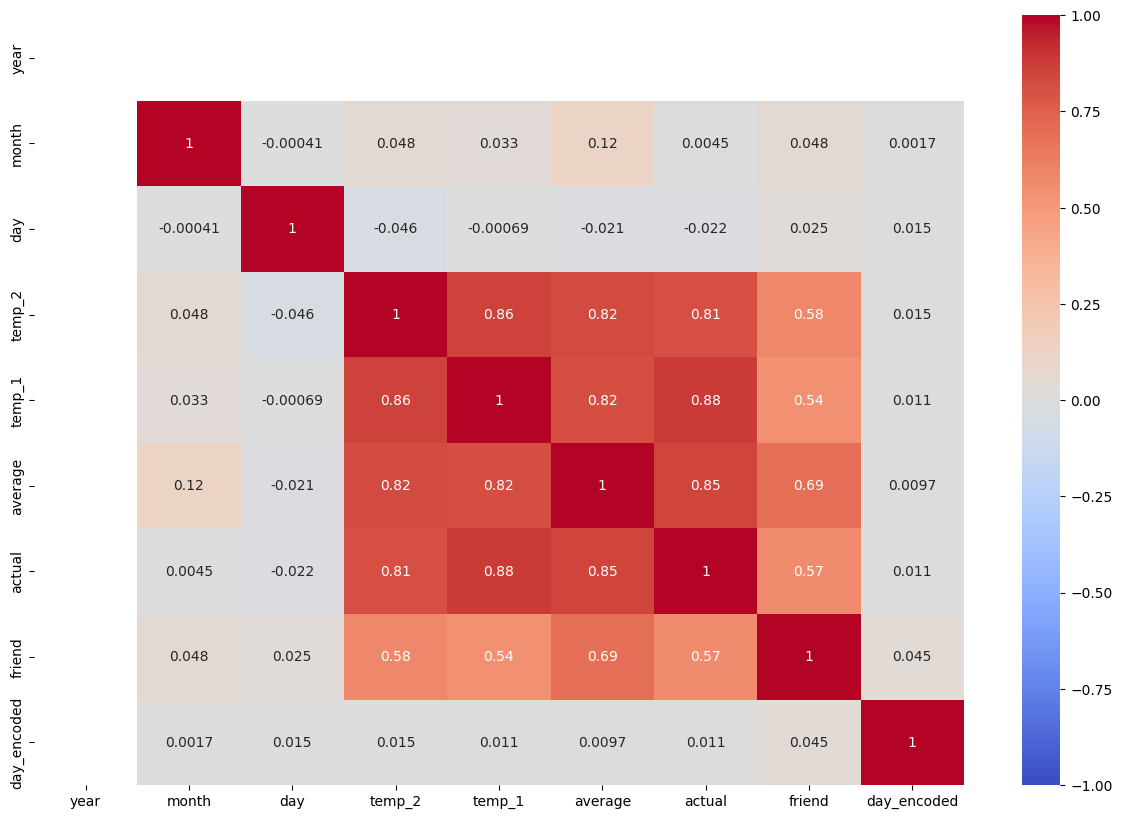

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)

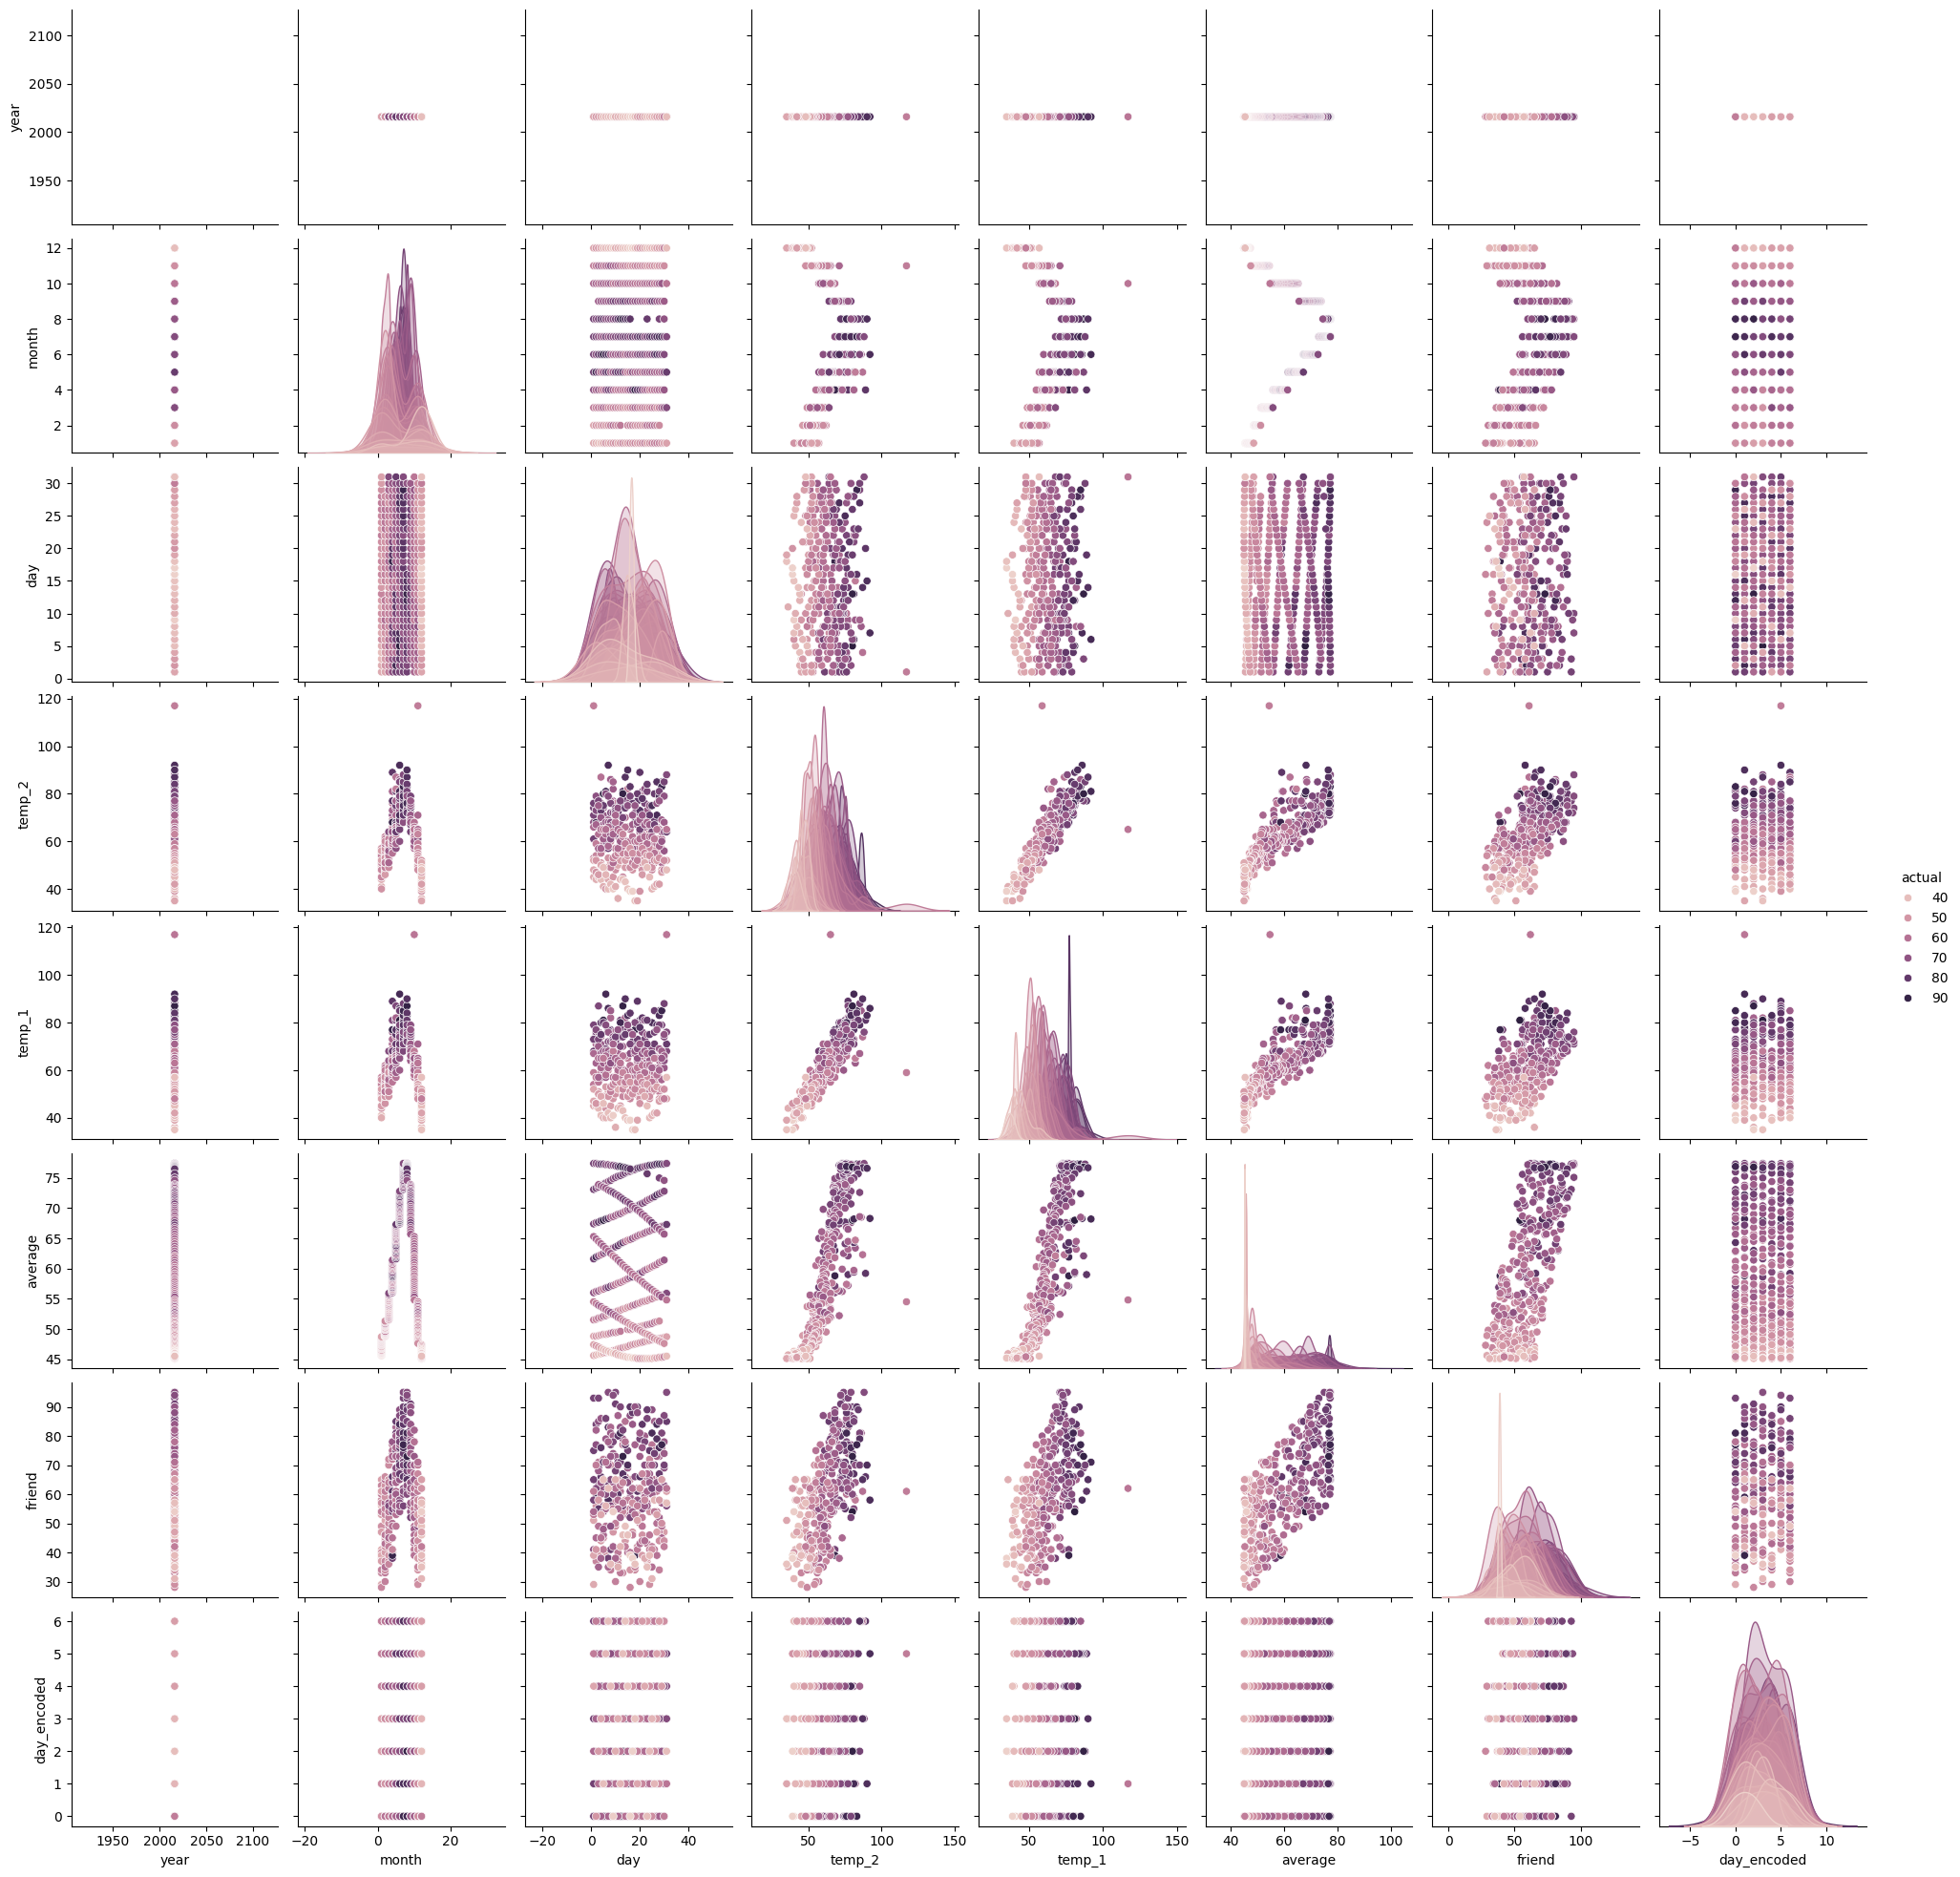

In [8]:
sns.pairplot(df, hue='actual')

### 3. Selecciona variables y divide en train y test

In [ ]:
x = df[['temp_2', 'temp_1', 'average', 'friend']]
y = df['actual']
x_2 = df[['temp_1', 'average', 'friend']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape
X_test.shape

(70, 4)

In [12]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.2, random_state=42)

In [13]:
print(X_train_2.shape)
print(X_test_2.shape)

(278, 3)
(70, 3)


### 4. Entrena el modelo


In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeRegressor(random_state=42)
tree_clf.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [16]:
predictions = tree_clf.predict(X_test)

In [ ]:
tree_clf_2 = DecisionTreeRegressor(random_state=42)
tree_clf_2.fit(X_train_2, y_train_2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
predictions_2 = tree_clf_2.predict(X_test_2)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#PRIMER MODELO

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("r2_score train", tree_clf.score(X_train, y_train))
print("r2_score test",tree_clf.score(X_test, y_test))

MAE: 5.5285714285714285
MSE: 51.9
RMSE: 7.20416546173115
MAPE: 0.086719561592006
r2_score train 1.0
r2_score test 0.628822554090819


In [25]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#SEGUNDO MODELO


print('MAE:', metrics.mean_absolute_error(y_test_2, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test_2, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_2, predictions_2)))
print("MAPE:", mean_absolute_percentage_error(y_test_2, predictions_2))
print("r2_score train", tree_clf_2.score(X_train_2, y_train_2))
print("r2_score test",tree_clf_2.score(X_test_2, y_test_2))

MAE: 5.114285714285714
MSE: 44.77142857142857
RMSE: 6.691145535065619
MAPE: 0.08074009661942806
r2_score train 1.0
r2_score test 0.6798045374403046


### 6. Representa el árbol de decisión

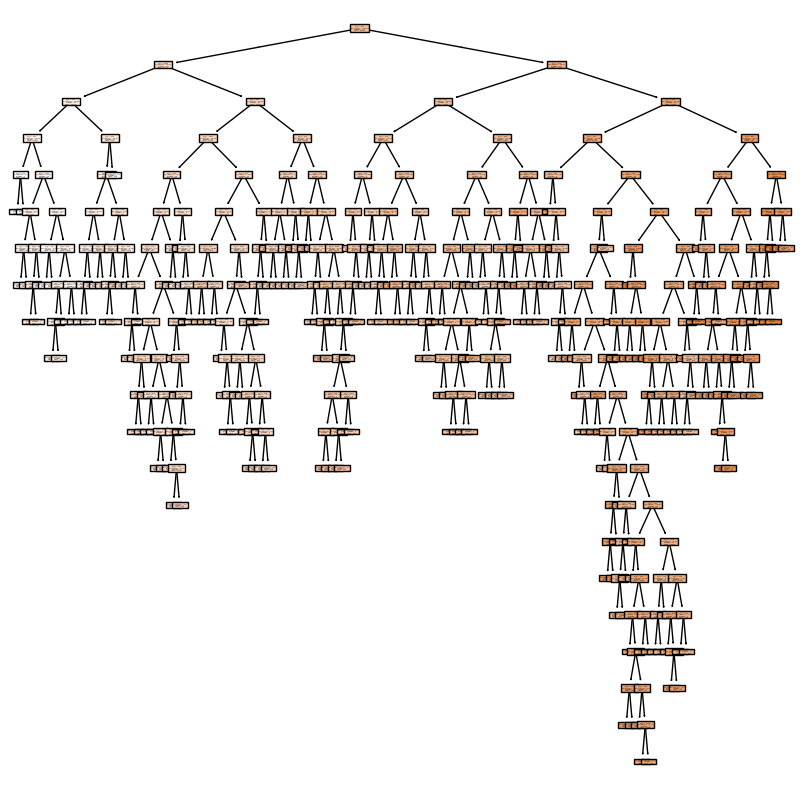

In [28]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
                class_names=None,
               filled = True);

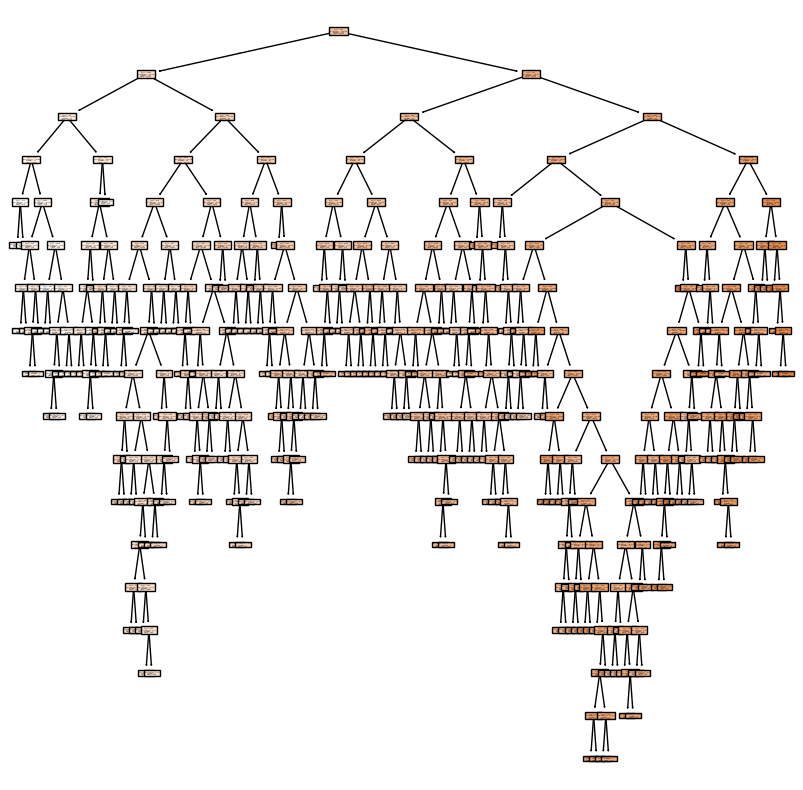

In [29]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf_2,
                class_names=None,
               filled = True);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [30]:

tree_clf_3d = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_clf_3d.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [34]:
predictions_3d = tree_clf_3d.predict(X_test)

In [31]:

tree_clf_2_3d = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_clf_2_3d.fit(X_train_2, y_train_2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
predictions_2_3d = tree_clf_2_3d.predict(X_test_2)

### 8. Vuelve a evaluar tu modelo

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_3d))
print('MSE:', metrics.mean_squared_error(y_test, predictions_3d))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_3d)))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions_3d))
print("r2_score train", tree_clf_3d.score(X_train, y_train))
print("r2_score test",tree_clf_3d.score(X_test, y_test))

MAE: 4.267242249556827
MSE: 30.946461197509944
RMSE: 5.5629543587476915
MAPE: 0.0674392768128964
r2_score train 0.8397458755018086
r2_score test 0.7786776796296856


In [38]:
print('MAE:', metrics.mean_absolute_error(y_test_2, predictions_2_3d))
print('MSE:', metrics.mean_squared_error(y_test_2, predictions_2_3d))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_2, predictions_2_3d)))
print("MAPE:", mean_absolute_percentage_error(y_test_2, predictions_2_3d))
print("r2_score train", tree_clf_2_3d.score(X_train_2, y_train))
print("r2_score test",tree_clf_2_3d.score(X_test_2, y_test_2))

MAE: 4.267242249556827
MSE: 30.946461197509944
RMSE: 5.5629543587476915
MAPE: 0.0674392768128964
r2_score train 0.8397458755018086
r2_score test 0.7786776796296856


### 9. Vuelve a representar su árbol

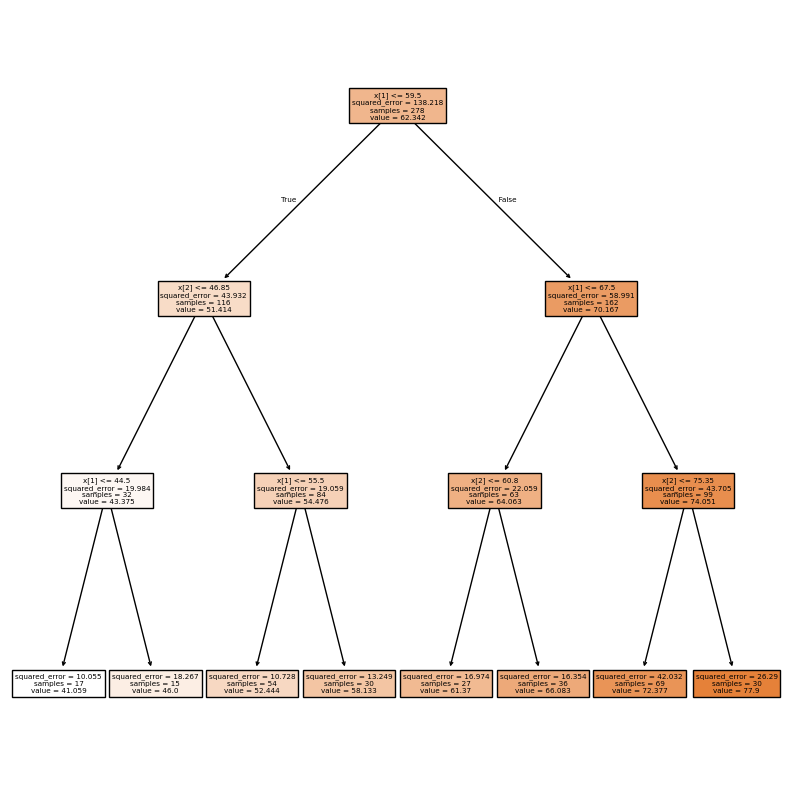

In [41]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf_3d,
                class_names=None,
               filled = True);

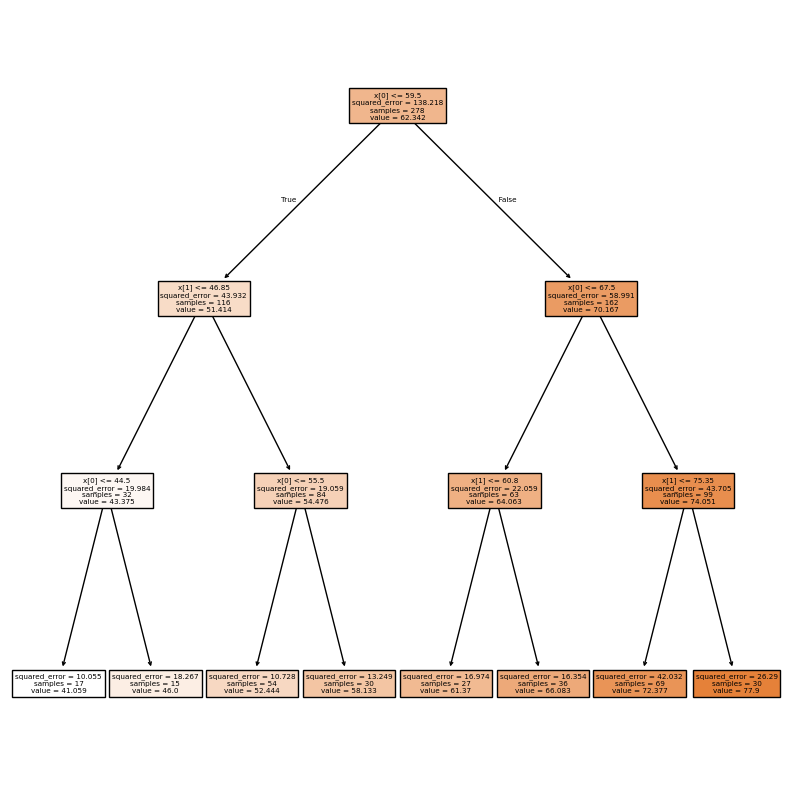

In [40]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf_2_3d,
                class_names=None,
               filled = True);

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,4,5,6],      # Profundidad máxima
    'min_samples_split': [4, 5, 9],      # Mínimo muestras para dividir
    'min_samples_leaf': [4,5,8]         # Mínimo muestras en hoja
}

grid_search = GridSearchCV(
    estimator=tree_clf_2_3d,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross validation
    scoring='accuracy',      # Métrica a optimizar
    n_jobs=-1,              # Usar todos los cores del CPU
    verbose=2               # Mostrar progreso detallado
)

grid_search.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'min_samples_leaf': [4, 5, ...], 'min_samples_split': [4, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [48]:
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación: {grid_search.best_score_:.4f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_2)

print('MAE:', metrics.mean_absolute_error(y_test_2, y_pred))
print('MSE:', metrics.mean_squared_error(y_test_2, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test_2, y_pred))
print("r2_score train", best_model.score(X_train_2, y_train_2))
print("r2_score test",best_model.score(X_test_2, y_test_2))

Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4}
Mejor puntuación: nan
MAE: 4.267242249556827
MSE: 30.946461197509944
RMSE: 5.5629543587476915
MAPE: 0.0674392768128964
r2_score train 0.8397458755018086
r2_score test 0.7786776796296856


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [50]:
best_model.feature_importances_

array([0.88110924, 0.11889076, 0.        ])

In [51]:
X_train_2.columns

Index(['temp_1', 'average', 'friend'], dtype='object')

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC (59ºF). ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [52]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,day_encoded
0,2016,1,1,Fri,45,45,45.6,45,29,0
1,2016,1,2,Sat,44,45,45.7,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,56,3
3,2016,1,4,Mon,44,41,45.9,40,53,1
4,2016,1,5,Tues,41,40,46.0,44,41,5


In [56]:
df['actual > 59'] = df['actual']>59
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,day_encoded,actual > 59
0,2016,1,1,Fri,45,45,45.6,45,29,0,False
1,2016,1,2,Sat,44,45,45.7,44,61,2,False
2,2016,1,3,Sun,45,44,45.8,41,56,3,False
3,2016,1,4,Mon,44,41,45.9,40,53,1,False
4,2016,1,5,Tues,41,40,46.0,44,41,5,False


In [59]:
x_cl = df[['temp_1', 'average', 'friend']]
y_cl = df['actual > 59']

In [61]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(x_cl, y_cl, test_size=0.2, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_cl = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf_cl.fit(X_train_cl, y_train_cl)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
predictions_cl = tree_clf_cl.predict(X_test_cl)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test_cl, predictions_cl))
print('MSE:', metrics.mean_squared_error(y_test_cl, predictions_cl))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_cl, predictions_cl)))
print("MAPE:", mean_absolute_percentage_error(y_test_cl, predictions_cl))
print("r2_score train", best_model.score(X_train_cl, y_train_cl))
print("r2_score test",best_model.score(X_test_cl, y_test_cl))

MAE: 0.1
MSE: 0.1
RMSE: 0.31622776601683794
MAPE: 386022825203185.4
r2_score train -16128.447007915493
r2_score test -16197.21678721604
